In [9]:
from scipy.spatial import distance
from imutils import face_utils
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

In [10]:
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

In [11]:
thresh = 0.2
frame_check = 40
detect = dlib.get_frontal_face_detector()
predict = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [12]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [13]:
image = cv2.imread("2.jpeg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

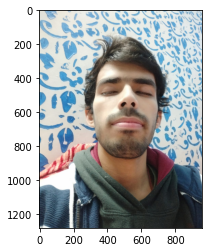

In [14]:
plt.imshow(image)

0.12607202915064508


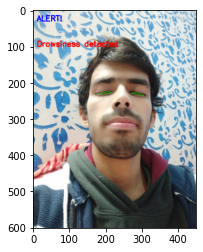

In [15]:
h,w = image.shape[:2]

frame = imutils.resize(image, width=450)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
subjects = detect(gray, 0)
for subject in subjects:
    shape = predict(gray, subject)
    shape = face_utils.shape_to_np(shape)
    leftEye = shape[lStart:lEnd]         #roi 
    rightEye = shape[rStart:rEnd]
    
    leftEAR = eye_aspect_ratio(leftEye)
    rightEAR = eye_aspect_ratio(rightEye)
    ear = (leftEAR + rightEAR) / 2.0
    leftEyeHull = cv2.convexHull(leftEye)
    rightEyeHull = cv2.convexHull(rightEye)
    cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
    cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
    if ear < thresh:
        cv2.putText(frame, "ALERT!", (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2.putText(frame, "Drowsiness detected", (10,100),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
    else:
        flag = 0
plt.imshow(frame)
print(ear)
#key = cv2.waitKey(1) & 0xFF
#if key == ord("q"):
#   break
    
#plt.imshow(image)
#cv2.waitKey(0)

In [8]:
type(shape)

numpy.ndarray